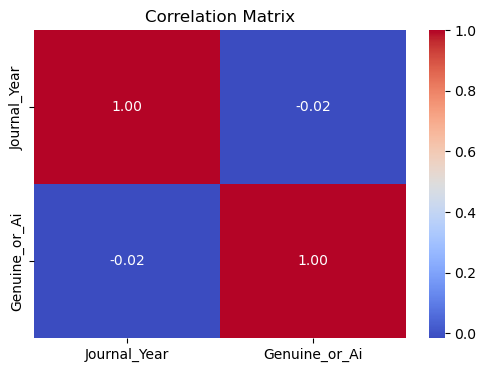

Model: Random Forest
Accuracy: 0.8663
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.68      0.80        79
           1       0.83      0.98      0.90       123

    accuracy                           0.87       202
   macro avg       0.90      0.83      0.85       202
weighted avg       0.88      0.87      0.86       202

--------------------------------------------------


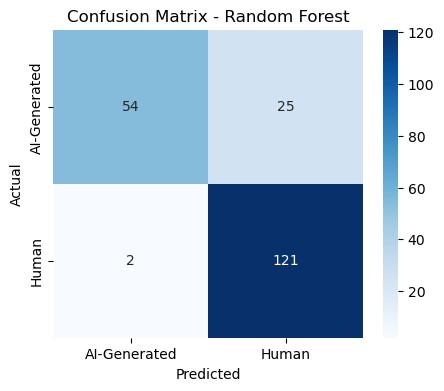

Model: Logistic Regression
Accuracy: 0.8762
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.68      0.81        79
           1       0.83      1.00      0.91       123

    accuracy                           0.88       202
   macro avg       0.92      0.84      0.86       202
weighted avg       0.90      0.88      0.87       202

--------------------------------------------------


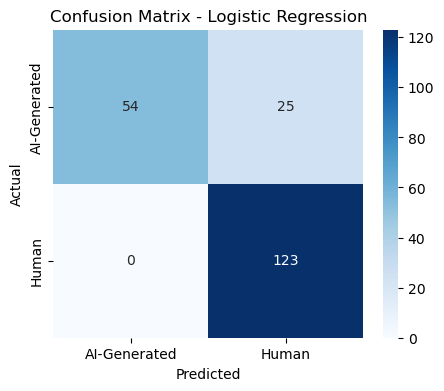

Model: Support Vector Machine
Accuracy: 0.8713
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.68      0.81        79
           1       0.83      0.99      0.90       123

    accuracy                           0.87       202
   macro avg       0.91      0.84      0.85       202
weighted avg       0.89      0.87      0.87       202

--------------------------------------------------


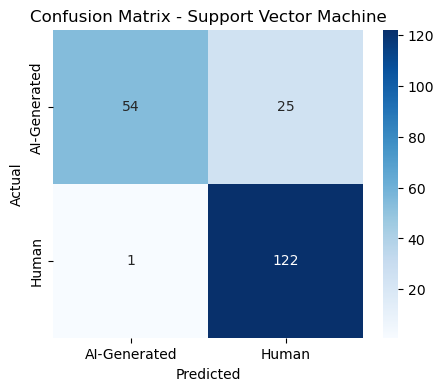

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load the dataset
file_path = r"C:\Users\KIIT\Desktop\ai_text_detection_tuples_dataset 1000 - Copy.csv"
 # Change this to your actual dataset file

df = pd.read_csv(file_path, encoding="latin1")

# Clean the dataset
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])
df = df.dropna()
df["Genuine_or_Ai"] = df["Genuine_or_Ai"].astype(int)

# Define features and labels
X = df["Paragraph"]
y = df["Genuine_or_Ai"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Display correlation matrix of numerical features
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Models to train and evaluate
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("-" * 50)
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["AI-Generated", "Human"], yticklabels=["AI-Generated", "Human"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()